# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Load_Data & EDA

In [2]:
insurance=pd.read_csv('insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
insurance.duplicated().sum()

1

In [7]:
insurance=insurance.drop_duplicates()

In [8]:
insurance.duplicated().sum()

0

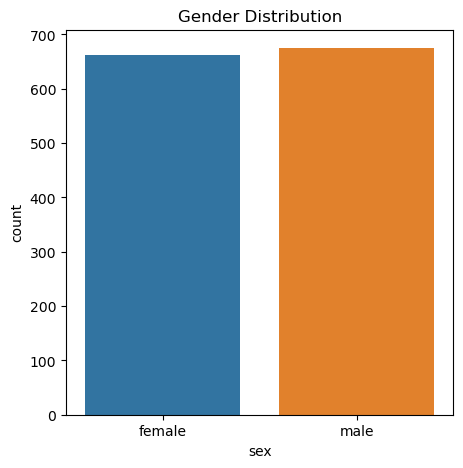

In [9]:
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data=insurance)
plt.title('Gender Distribution')
plt.show()

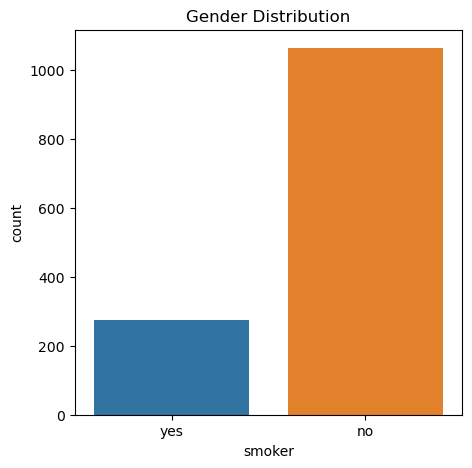

In [10]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=insurance)
plt.title('Gender Distribution')
plt.show()

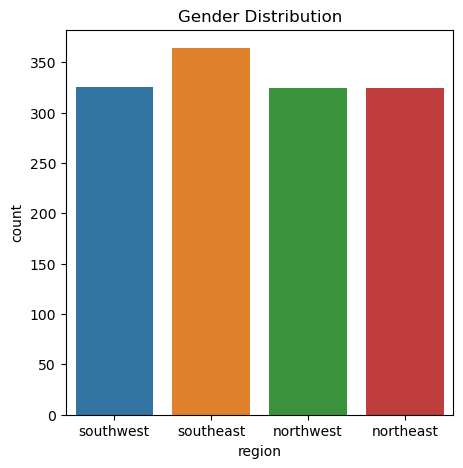

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=insurance)
plt.title('Gender Distribution')
plt.show()

In [12]:
# insurance['sex'] = insurance['sex'].apply({'male':0, 'female':1}.get)
# insurance['smoker'] = insurance['smoker'].apply({'yes':1, 'no':0}.get)
# insurance['region'] = insurance['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [13]:
label_encoder=LabelEncoder() 
insurance['sex']= label_encoder.fit_transform(insurance['sex'])
insurance['smoker']= label_encoder.fit_transform(insurance['smoker'])
insurance['region']= label_encoder.fit_transform(insurance['region'])

In [14]:
# insurance = pd.get_dummies(insurance, columns = ['region'])
# insurance.head()

In [15]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


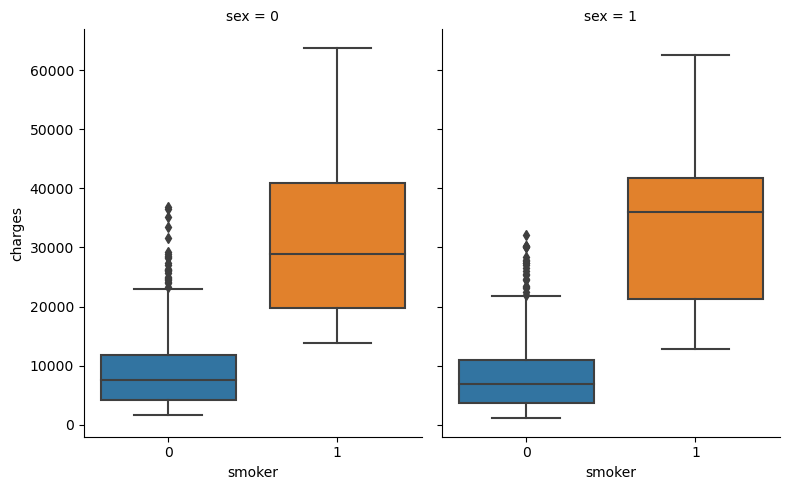

In [16]:
sns.catplot(x="smoker", y="charges",col="sex",data= insurance, kind="box",height=5, aspect=0.8);

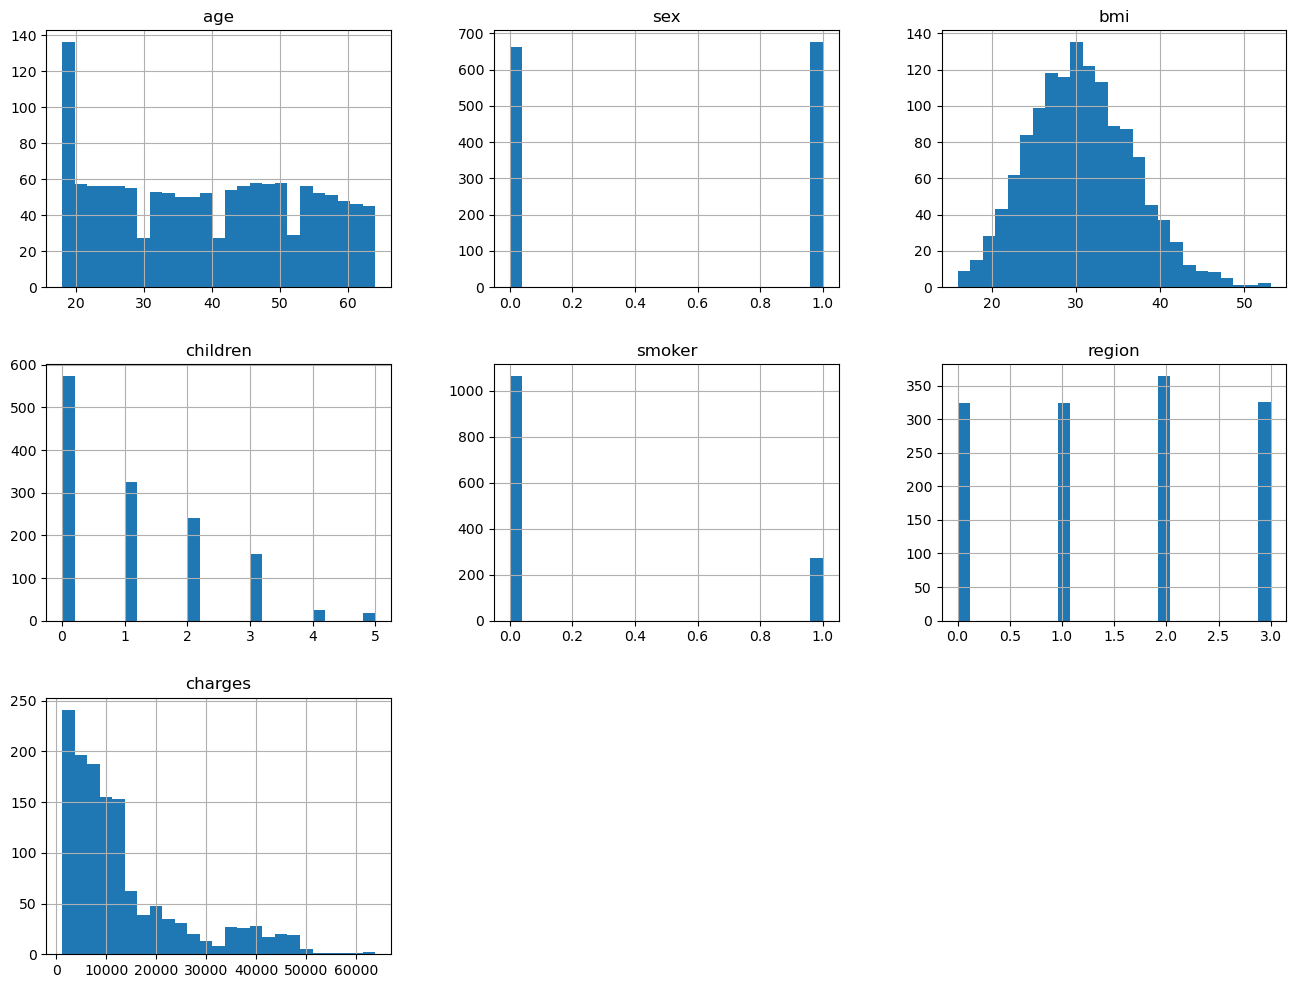

In [17]:
insurance.hist(bins=25, figsize=(16, 12))
plt.show()

<AxesSubplot:xlabel='charges', ylabel='Density'>

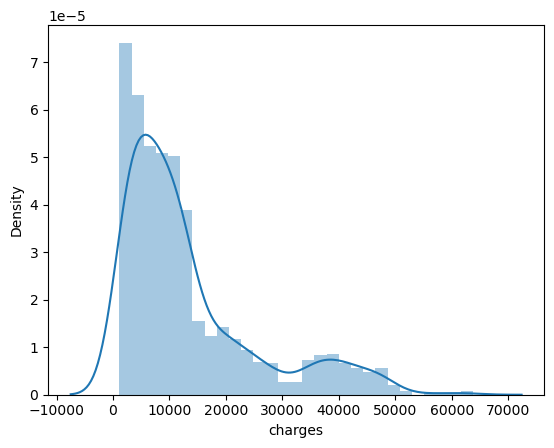

In [18]:
sns.distplot(insurance['charges'])

<AxesSubplot:>

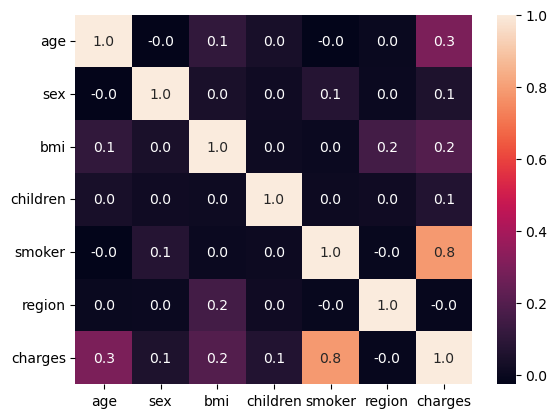

In [20]:
corr_matrix = insurance.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".1f")

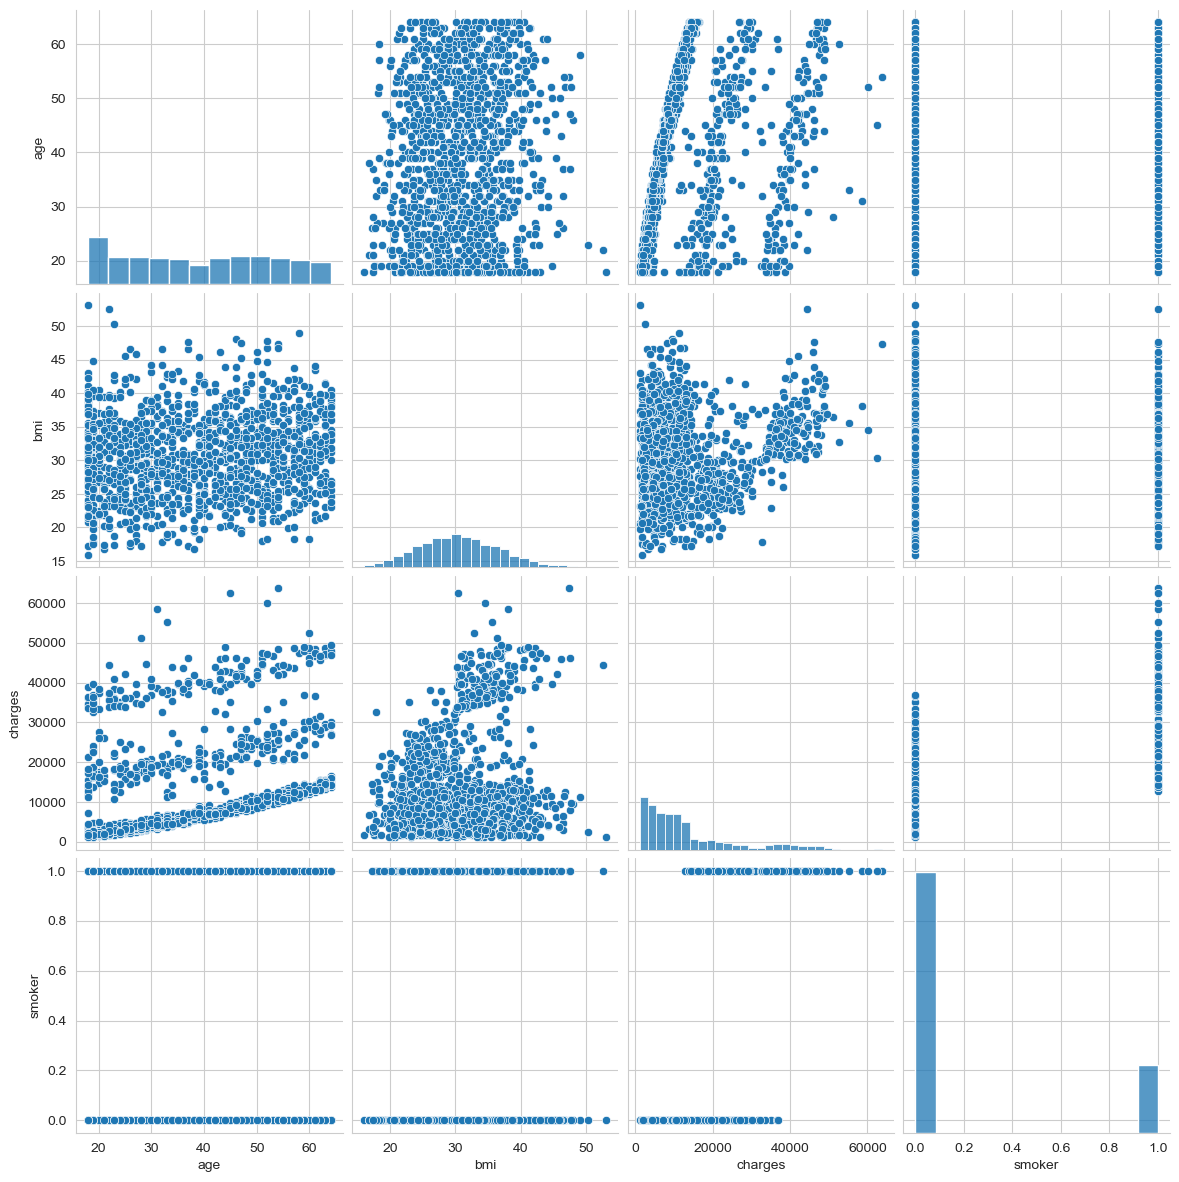

In [21]:
sns.set_style("whitegrid")
sns.pairplot(insurance[["age", "bmi", "charges", "smoker"]],
            
            height = 3,
            palette="Set1")

# split data to train and test 

In [22]:
X=insurance.drop('charges',axis=1)
y=insurance['charges']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

# Scaling

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train

In [25]:
LR_model=LinearRegression()
LR_model.fit(X_train_scaled,y_train)

LinearRegression()

In [26]:
LR_model.coef_

array([3407.39029443,  -41.20915348, 1817.6675153 ,  573.59494002,
       9469.18552033, -446.50711323])

# Evaluation

In [27]:
y_predict = LR_model.predict(X_test_scaled)

In [28]:
print("MSE:",mean_squared_error(y_test,y_predict))
print("MAE:",mean_absolute_error(y_test,y_predict))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_predict)))
print("R_squared:",r2_score(y_test,y_predict))

MSE: 38782889.81423141
MAE: 4239.713939585065
RMSE: 6227.591012119487
R_squared: 0.7631717420685993
